In [376]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [377]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


In [378]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
print(df.shape)

Date                       datetime64[ns]
Year                                int64
Month                              object
Recession                           int64
Consumer_Confidence               float64
Seasonality_Weight                float64
Price                               int64
Advertising_Expenditure           float64
Competition                         int64
GDP                               float64
Growth_Rate                       float64
unemployment_rate                 float64
Automobile_Sales                  float64
Vehicle_Type                       object
City                               object
dtype: object
(2112, 15)


In [379]:
print(df.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


In [380]:
df.describe()

,Date,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,2112,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,2002-01-20 16:12:57.272727296,2001.520833,0.224432,101.210890,0.737756,41469.506155,2879.743655,6.118845,40.205748,-0.237074,2.441525,3164.160511
min,1980-01-31 00:00:00,1980.000000,0.000000,73.900000,0.250000,15001.000000,494.200000,3.000000,12.510000,-4.230000,1.000000,40.000000
25%,1991-04-30 00:00:00,1991.000000,0.000000,94.060000,0.500000,22039.000000,1872.000000,4.000000,27.210000,-0.570000,1.600000,923.000000
50%,2002-02-28 00:00:00,2002.000000,0.000000,100.800000,0.810000,34957.500000,2883.500000,6.000000,39.420000,-0.005000,2.300000,2381.500000
75%,2012-10-07 18:00:00,2012.000000,0.000000,108.320000,0.940000,57418.250000,3902.425000,8.000000,53.862500,0.392500,2.900000,4363.500000
max,2023-12-31 00:00:00,2023.000000,1.000000,131.670000,1.500000,79998.000000,4983.000000,9.000000,70.370000,0.820000,6.000000,65645.000000
std,NaN,12.535031,0.417306,10.634092,0.286092,21388.409141,1175.338324,1.964292,16.291271,0.859691,1.108472,3640.137399


## **Creating Visualizations for Data Analysis**

### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

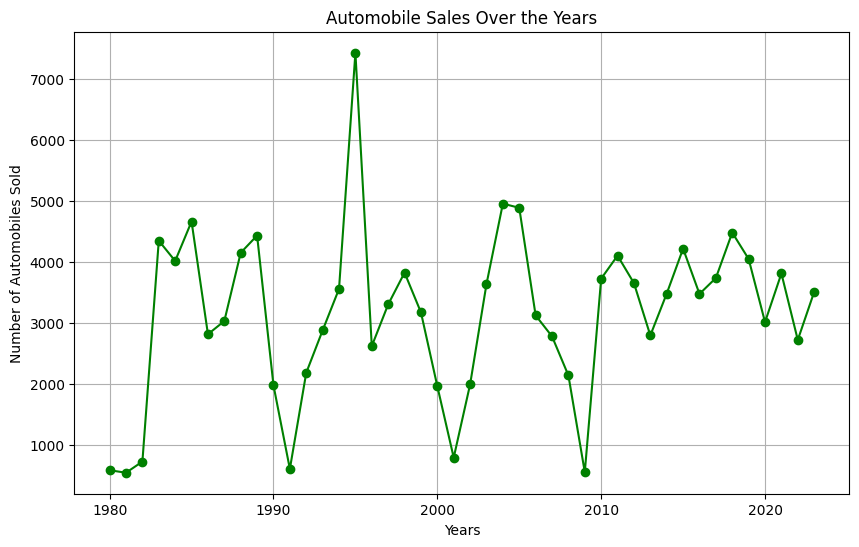

In [382]:
# Grouping
df_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Plotting
df_sales.plot.line(x=df_sales.index, 
                   y=df_sales.values, 
                   figsize=(10,6), 
                   marker='o', 
                   color='green', 
                   grid=True)

plt.xlabel('Years')
plt.ylabel('Number of Automobiles Sold')
plt.title('Automobile Sales Over the Years')
plt.show()

### With Annotation

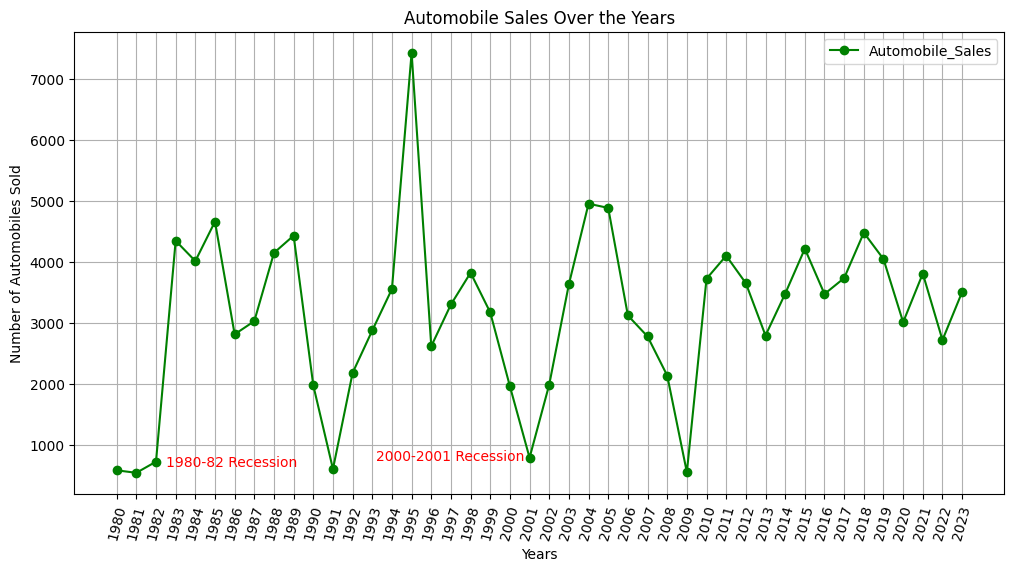

In [383]:
# Grouping
df_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Plotting
df_sales.plot.line(x=df_sales.index, 
                   y=df_sales.values, 
                   figsize=(12,6), 
                   marker='o', 
                   color='green', 
                   grid=True)

plt.xlabel('Years')
plt.ylabel('Number of Automobiles Sold')
plt.title('Automobile Sales Over the Years')
plt.xticks(list(range(df_sales.index.min(), df_sales.index.max()+1)), rotation=75)
plt.text(1982.5, 650, '1980-82 Recession', color='red')
plt.text(1993.2, 750, '2000-2001 Recession', color='red')
plt.legend()

plt.show()


####  TASK 1.2: How do trends in advertising expenditure correlate with automobile sales during non-recession periods, and what insights can be derived from this relationship.


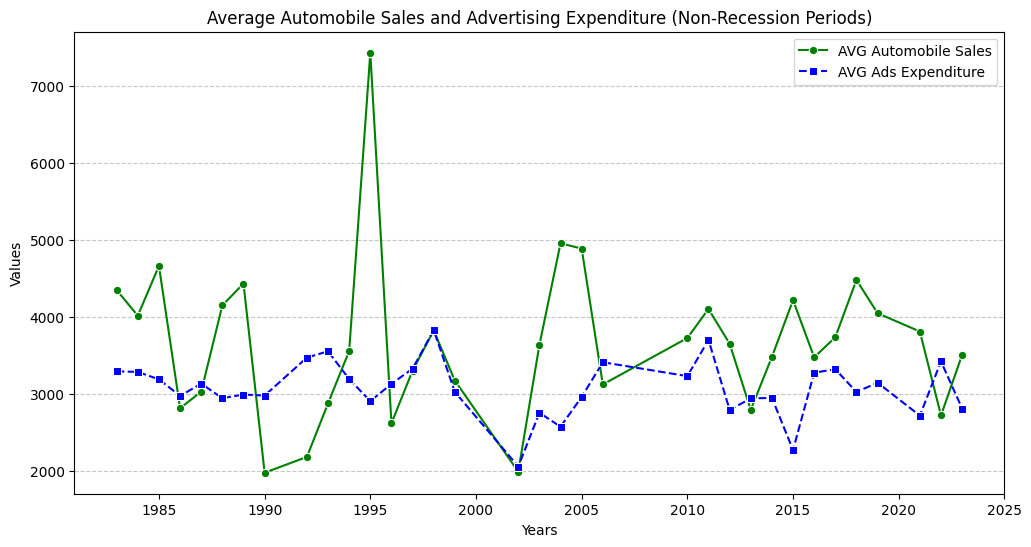

In [406]:
# Filter for non-recession periods
non_recession = df[df['Recession'] == 0]

# Grouping and calculate avg sales and avg ads expenditure by year
new_df = non_recession.groupby('Year').agg(
    avg_sales = ('Automobile_Sales', 'mean'),
    avg_ad_exp = ('Advertising_Expenditure', 'mean')
)

# Create figure
plt.figure(figsize=(12,6))

# Plotting
sns.lineplot(data=new_df, x='Year', y='avg_sales', marker='o', linestyle='-', color='green', label='AVG Automobile Sales')
sns.lineplot(data=new_df, x='Year', y='avg_ad_exp', marker='s', linestyle='--', color='blue', label='AVG Ads Expenditure')

# Add labels, legend, title, and grid
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Average Automobile Sales and Advertising Expenditure (Non-Recession Periods)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**What insight did i got?**

> There is no strong correlation between advertising spend and car sales. Sales are highly volatile and driven by other factors, while ad spend remains relatively constant.
However, There is a massive anomaly in 1995 where sales doubled without explanation. We should treat that data point with suspicion."

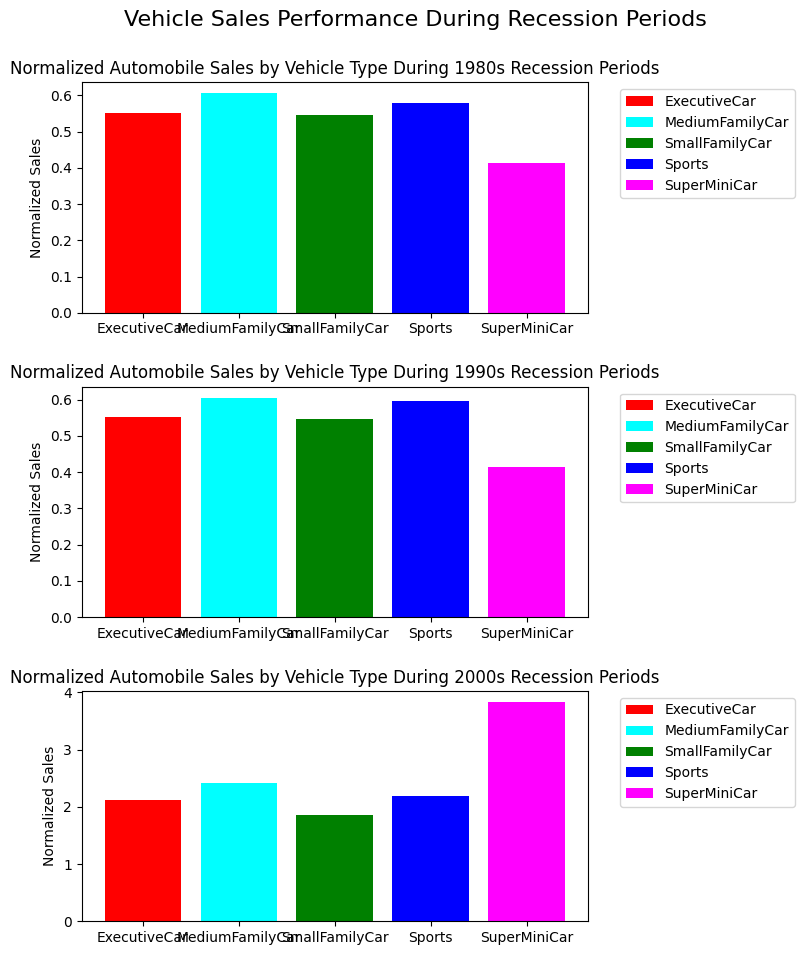

In [403]:
recession_80s = df_recession[df_recession.index < 1990]
recession_90s = df_recession[df_recession.index < 2000]
recession_00s = df_recession[df_recession.index >= 2000]

# 1. Gather ALL unique vehicle types from your combined data
all_vehicles = pd.concat([recession_80s['Vehicle_Type'], recession_90s['Vehicle_Type'], recession_00s['Vehicle_Type']]).unique()

# 2. Define the base colors (you can add more if needed)
colors_list = ['red', 'cyan', 'green', 'blue', 'magenta', 'orange', 'purple']

# 3. Create the mapping dictionary
# This ensures 'Mediumfamilycar' ALWAYS maps to 'red', 'Smallfamilycar' ALWAYS maps to 'cyan', etc.
color_map = {
    vehicle: colors_list[i % len(colors_list)]  # Use modulo to cycle colors if list is too short
    for i, vehicle in enumerate(all_vehicles)
}
# Create a figure with 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# --- Plot 1 (Recession 80s) ---
for vehicle_type in recession_80s['Vehicle_Type'].unique():
    data = recession_80s[recession_80s['Vehicle_Type'] == vehicle_type]
    
    # Use the color mapped to this specific vehicle type
    color_to_use = color_map[vehicle_type]
    
    axes[0].bar(data['Vehicle_Type'], data['Normalized_Sales'], 
                color=color_to_use, 
                label=vehicle_type)
    axes[0].set_title('Normalized Automobile Sales by Vehicle Type During 1980s Recession Periods')
    axes[0].set_ylabel('Normalized Sales')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Plot 2 (Recession 90s) ---
for vehicle_type in recession_90s['Vehicle_Type'].unique():
    data = recession_90s[recession_90s['Vehicle_Type'] == vehicle_type]
    
    # Look up the color again
    color_to_use = color_map[vehicle_type]
    
    axes[1].bar(data['Vehicle_Type'], data['Normalized_Sales'], 
                color=color_to_use, 
                label=vehicle_type)
    axes[1].set_title('Normalized Automobile Sales by Vehicle Type During 1990s Recession Periods')
    axes[1].set_ylabel('Normalized Sales')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Plot 3 (Recession 00s) ---
for vehicle_type in recession_00s['Vehicle_Type'].unique():
    data = recession_00s[recession_00s['Vehicle_Type'] == vehicle_type]
    
    # Look up the color again
    color_to_use = color_map[vehicle_type]
    
    axes[2].bar(data['Vehicle_Type'], data['Normalized_Sales'], 
                color=color_to_use, 
                label=vehicle_type)
    axes[2].set_title('Normalized Automobile Sales by Vehicle Type During 2000s Recession Periods')
    axes[2].set_ylabel('Normalized Sales')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.suptitle('Vehicle Sales Performance During Recession Periods', fontsize=16, y=1.0)

plt.tight_layout(
    rect=[0, 0.05, 1, 1],  # Keep this to preserve space for the external legend
    h_pad=2.0              # Add a vertical padding of 2.0 (default is usually 0.5)
)
plt.show()

### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [386]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


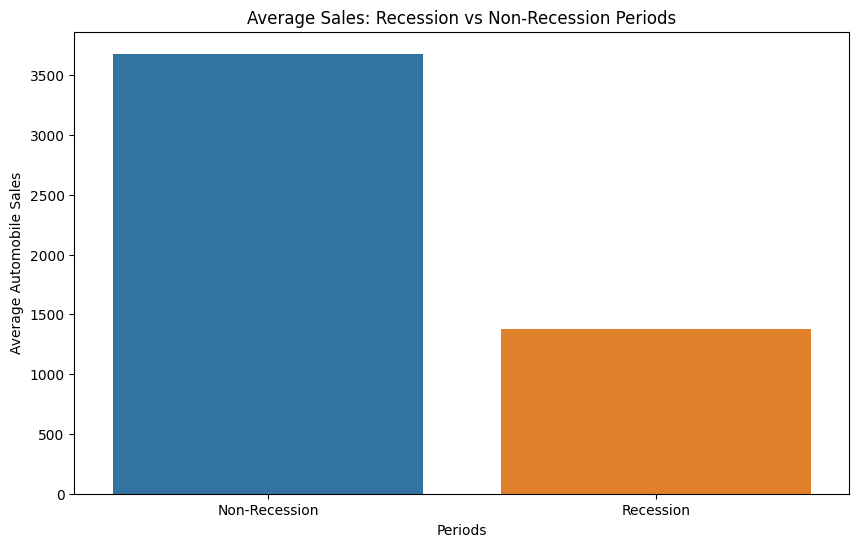

In [387]:
# Grouping for comparison
comparison1 = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=comparison1, legend=False)

# Add lables and title
plt.ylabel('Average Automobile Sales')
plt.xlabel('Periods')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.title('Average Sales: Recession vs Non-Recession Periods')
plt.show()

### Comparing Sales per Vehicle Type

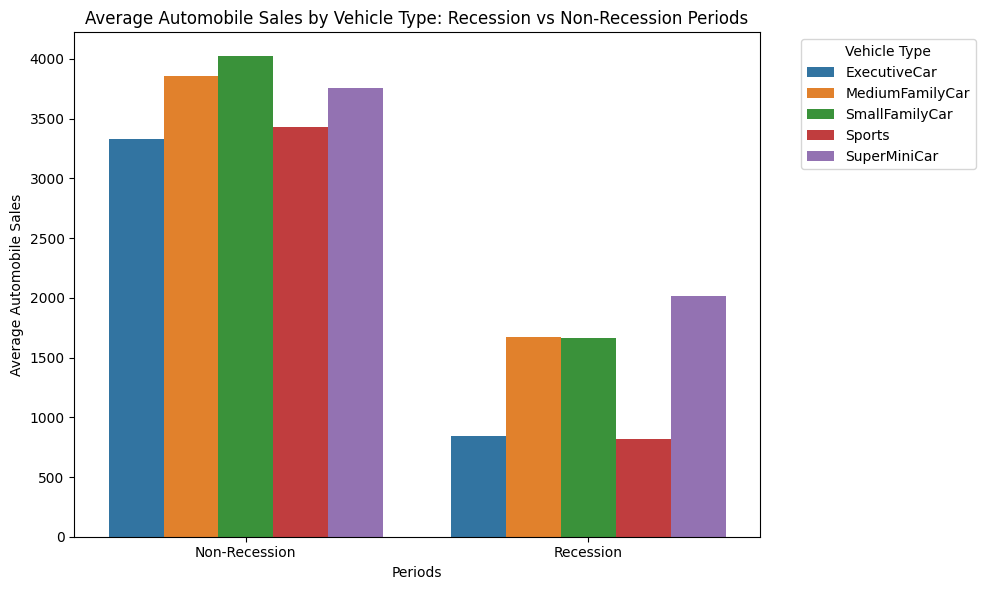

In [388]:
# Grouping for comparison by Vehicle Type
comparison2 = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10,6))

# Plotting
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=comparison2)
plt.xlabel('Periods')
plt.ylabel('Average Automobile Sales')
plt.xticks([0, 1], ['Non-Recession', 'Recession'])
plt.title('Average Automobile Sales by Vehicle Type: Recession vs Non-Recession Periods')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **What insight did i got?**

> Sales are evenly spread. People buy all vehicle types. "Medium Family Car" and "Sports Car" are the top sellers. However, when a recession hits, sales volume drops by 75%. All vehicle types sales suffer, especially **Sports Cars** see the most dramatic collapse in volume.

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

In [389]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


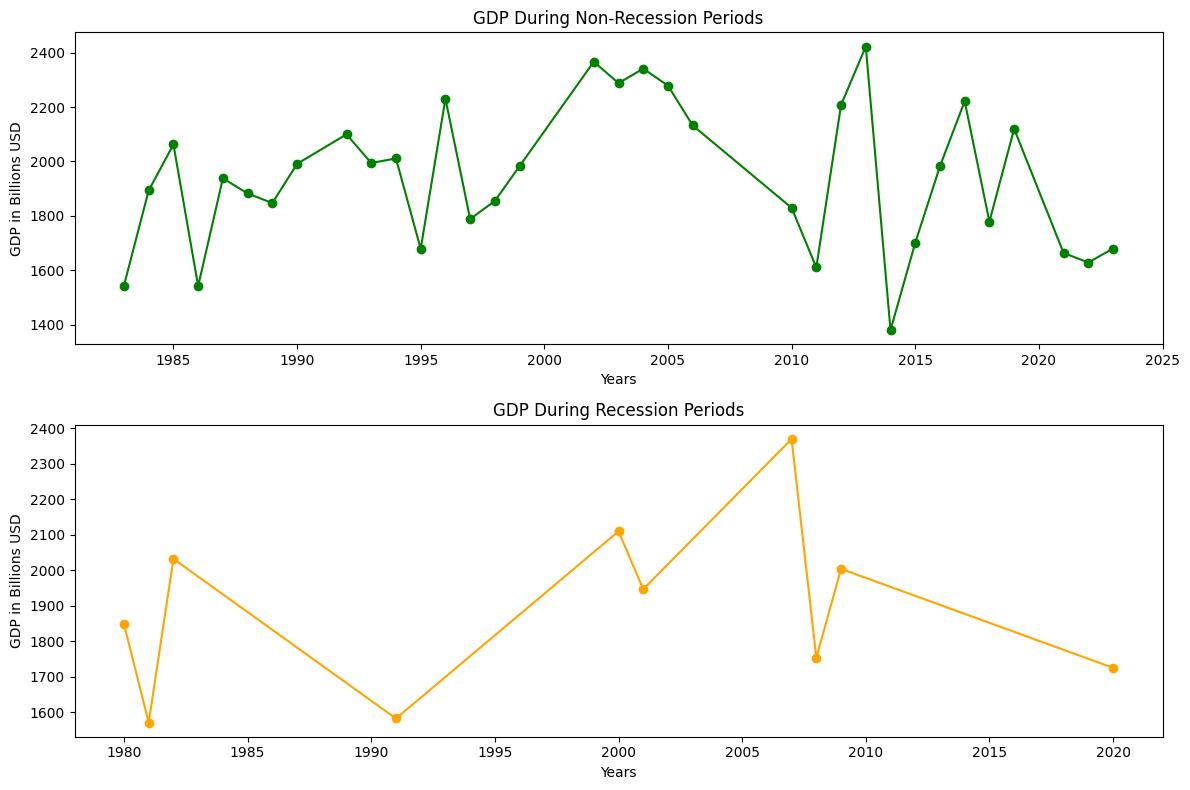

In [390]:
# Create figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

# Plot 1: Non-Recession Period
non_recession = df[df['Recession'] == 0].groupby('Year', as_index=False)['GDP'].sum()

axes[0].plot(non_recession['Year'], non_recession['GDP'], marker='o', color='Green')
axes[0].set_title('GDP During Non-Recession Periods')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('GDP in Billions USD')


# Plot 2: Recession Period
recession= df[df['Recession'] == 1].groupby('Year', as_index=False)['GDP'].sum()

axes[1].plot(recession['Year'], recession['GDP'], marker='o', color='Orange')
axes[1].set_title('GDP During Recession Periods')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('GDP in Billions USD')


plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

* How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

* Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble
Title this plot as 'Seasonality impact on Automobile Sales'

In [391]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


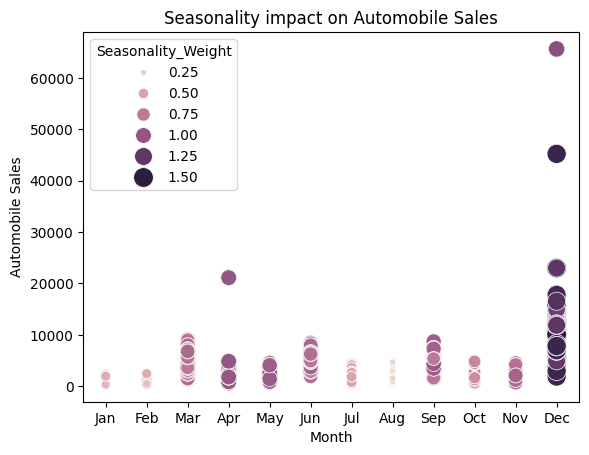

In [392]:
# Plotting
non_recession = df[df['Recession'] == 0]

sns.scatterplot(data=non_recession, x='Month', y='Automobile_Sales', size='Seasonality_Weight', sizes=(20,200), hue='Seasonality_Weight')
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')

plt.show()

**What insight did i got?**

Seasonality weight doesn't have any impact on the overall sales. However, there is a dramatic raise in sales in the month of April.

### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions

* From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

* Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

In [393]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


#### Consumer Confidence vs Sales during recession period

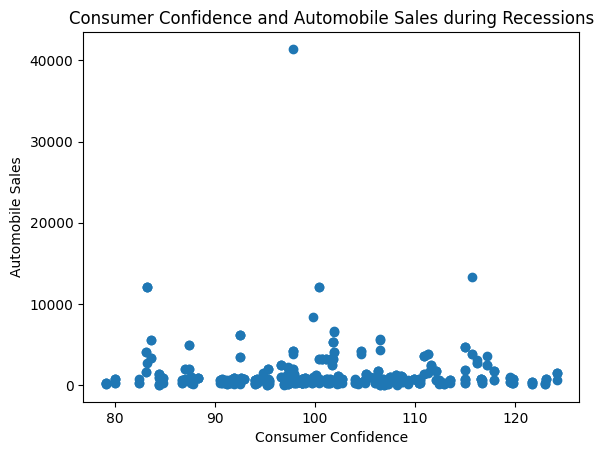

In [394]:
# Filtering data for recession period
recession = df[df['Recession'] == 1]

# Plotting
plt.scatter(recession['Consumer_Confidence'], recession['Automobile_Sales'])

# add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

#### Average Vehicle Price vs Sales

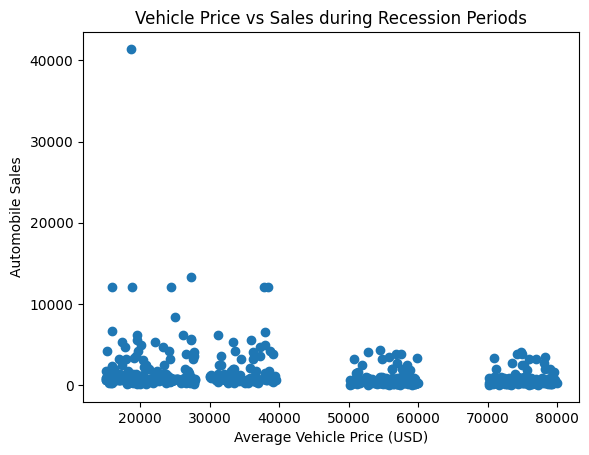

In [395]:
# Plotting
plt.scatter(recession['Price'], recession['Automobile_Sales'])

# Add labels and title
plt.xlabel('Average Vehicle Price (USD)')
plt.ylabel('Automobile Sales')
plt.title('Vehicle Price vs Sales during Recession Periods')

plt.show()

**What insight did i got?**

There's not much correlation. Neither between Consumer Confidence and Sales, nor between Average Vehicle Price and Sales.

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

In [396]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


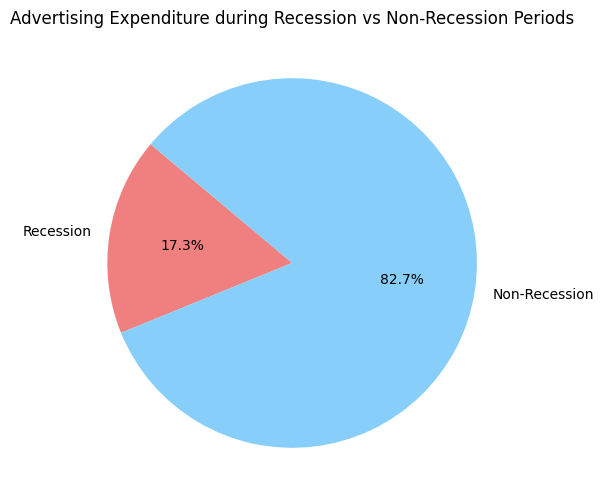

In [397]:
recession = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

labels = ['Recession', 'Non-Recession']
sizes = [recession, non_recession]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Advertising Expenditure during Recession vs Non-Recession Periods', loc='center')

plt.show()

**What insight did i got?**

XYZAutomotives spend less money on advertisement during recession period.

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

Can we observe the share of each vehicle type in total expenditure during recessions?

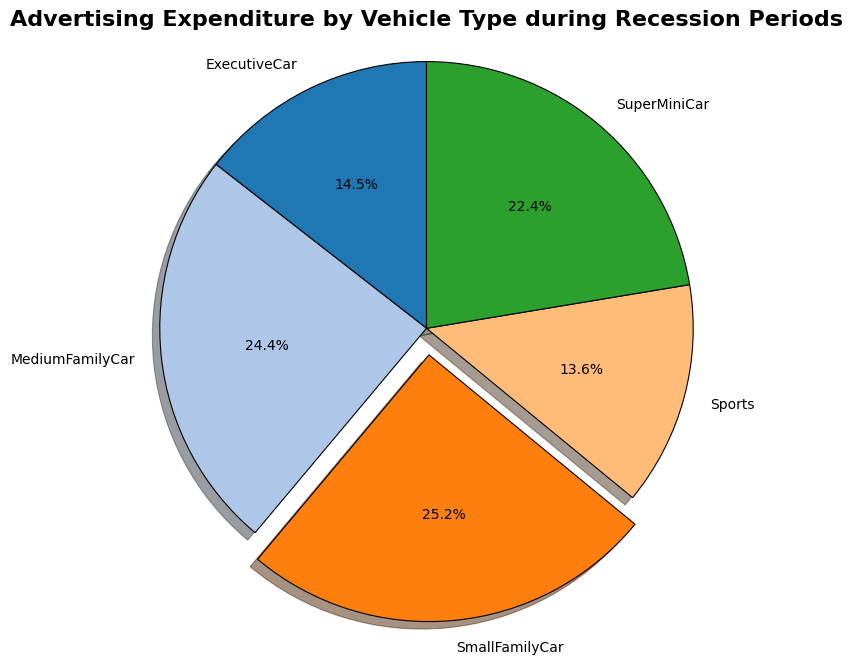

In [398]:
# Grouping (Your original code - remains the same)
adexp_Vtype = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

# 1. Prepare data for improvements
sizes = adexp_Vtype['Advertising_Expenditure']
labels = adexp_Vtype['Vehicle_Type']

# 2. Determine which slice to 'explode' (the largest one)
# This visually separates the most important category for emphasis.
# Find the index of the largest advertising expenditure
max_index = sizes.idxmax() 
explode = [0] * len(sizes) # Create a list of zeros for all slices
explode[max_index] = 0.1 # Set a non-zero value (0.1) for the largest slice to "explode" it

# 3. Define a custom color palette
# Using a custom palette is more professional than Matplotlib's default cycle.
colors = plt.cm.tab20.colors # Use a distinct color map (like tab20)

# 4. Plotting the professionalized chart
plt.figure(figsize=(10, 8)) # Increase figure size for better clarity

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',        # Format the percentage to one decimal point
    startangle=90,           # Start the first slice at the top (90 degrees)
    explode=explode,         # Apply the explode effect
    shadow=True,             # Add a subtle shadow for depth
    colors=colors,           # Use the professional color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8} # Add a thin border to slices
)

# Add title
plt.title('Advertising Expenditure by Vehicle Type during Recession Periods', fontsize=16, fontweight='bold')

# Ensure the pie chart is drawn as a circle (important for pie charts)
plt.axis('equal') 

# Display the chart
plt.show()

What insight did we got?

During recession periods, most of advertising expenditure goes to low price range car, like "medium" and "small" family car.

### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

In [399]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


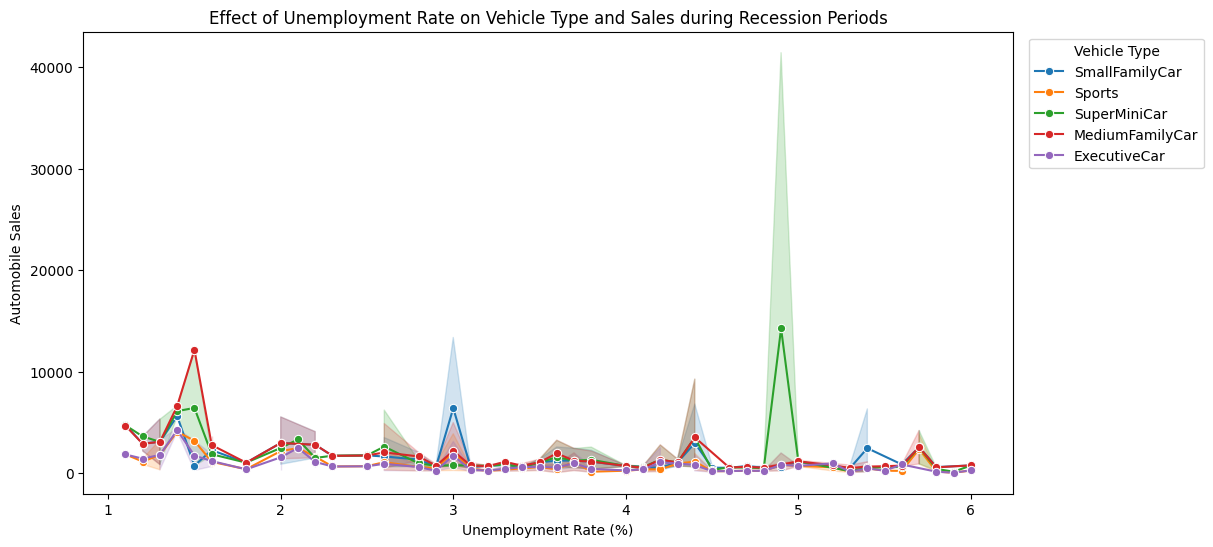

In [400]:
# Filtering data for recession period
recession = df[df['Recession'] == 1]

# Create figure
plt.figure(figsize=(12,6))

# Plotting
sns.lineplot(data=recession, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# Add labels and title
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Periods')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type',bbox_to_anchor=(1.01, 1), loc='upper left')

# Display the plot
plt.show()

**What insight did i got?**

The data shows a negatif correlation. As unemployment rate rise, vehicle sales goes down. Family cars are the safest choice, maintaining high volume until unemployment rate becomes severe (6%). Meanwhile, sports cars are the riskiest, with very low volume that halves as unemployment rate rises. However, sales for budget cars (suppermini) collapse suddenly once unemployment rate hits nearly 6%, suggesting that the poorest buyers exit the market entirely at that point.


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [401]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = 'us-states.json'

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Sucessfully downloaded '{filename}'")
else:
    print(f"Failed to downnload {filename}")

Sucessfully downloaded 'us-states.json'


#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth

In [402]:
# Filter for recession period
recession = df[df['Recession'] == 1]

# Group by sales by city
salesby_city = recession.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered for United States
map1 = folium.Map(location=(37.0902, -95.7129), zoom_start=5)

# Add choropleth layer to the map
choropleth = folium.Choropleth(
    geo_data = 'us-states.json',
    data = salesby_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession Periods'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
   folium.features.GeoJsonTooltip(['name'], labels=False)
)

# Display the map
map1